参考
- <http://blog.yhat.com/posts/logistic-regression-python-rodeo.html>
- <http://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import *  
# 定义自定义字体，文件名从1.b查看系统中文字体中来  
myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')  
# 解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus']=False

In [40]:
%matplotlib inline

In [41]:
auto = pd.read_csv('auto.csv',encoding = 'gb2312')
auto.head()

,EngSize,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss
0,2.0,56,男,已婚,20,公司,10,有,有防盗装置,进口,0.0
1,1.8,41,男,已婚,20,公司,9,有,无防盗装置,国产,0.0
2,2.0,44,男,未婚,20,公司,8,有,有防盗装置,国产,0.0
3,1.6,56,男,已婚,20,公司,7,有,有防盗装置,国产,0.0
4,1.8,45,男,已婚,20,公司,7,无,无防盗装置,国产,0.0


In [42]:
# 变量取值的转换

auto['LossClass'] = auto['Loss'].map(lambda x: 1 if x > 0 else 0)

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

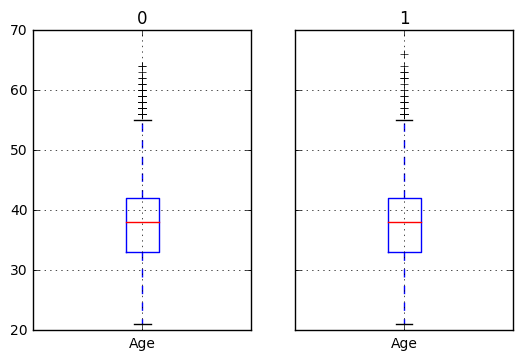

In [43]:
auto.groupby('LossClass').boxplot(column="Age")    #箱型图 

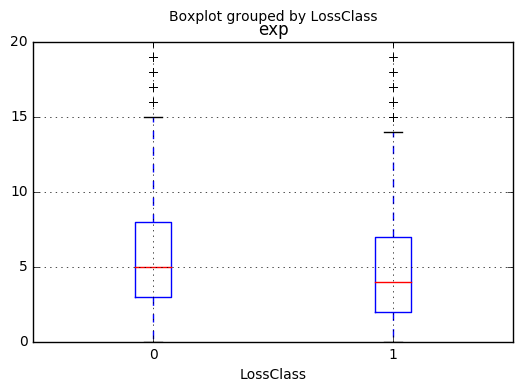

In [44]:
auto.boxplot(column="exp", by = "LossClass")

# 作业: 车龄与是否出险的关系

In [45]:
auto['Gender'] = auto['Gender'].map(lambda x: 'F' if x == u'女'else 'M')
pd.crosstab(auto['LossClass'], auto['Gender'], rownames=['LossClass'])

Gender,F,M
LossClass,,
0,293,2735
1,165,1040


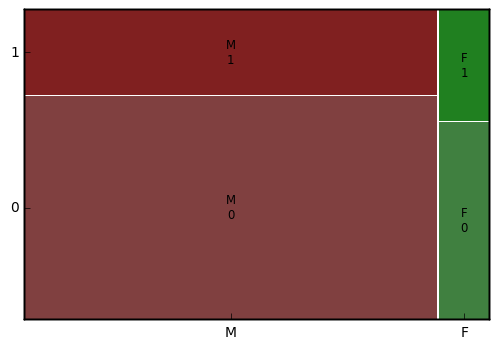

In [46]:
from statsmodels.graphics.mosaicplot import mosaic
import pylab
mosaic(auto,['Gender','LossClass'])                 #马赛克图
pylab.show()

# 作业，使用马赛克图分析想要的结果

In [47]:
# 二分类变量的转换
auto['Gender'] = auto['Gender'].map(lambda x: 1 if x == u'女'else 0)

auto['Marital'] = auto['Marital'].map(lambda x: 1 if x == u'已婚' else 0)

auto['Garage'] = auto['Garage'].map(lambda x: 1 if x == u'有'else 0)

auto['AntiTFD'] = auto['AntiTFD'].map(lambda x: 1 if x == u'有防盗装置'else 0)

auto['import'] = auto['import'].map(lambda x: 1 if x == u'进口'else 0)


# 变量取值的转换

auto['vAgeNew'] = auto['vAge'].map(lambda x: 1 if x == 1 else 0)

auto['EngType'] = auto['EngSize'].map(lambda x: 1 if x >1.6 else 0)

auto['Owner'] = auto['Owner'].replace({u'公司':1, u'私人':2, u'政府':3})

auto['Intercept'] = 1.0

# 另一种写法
# auto['Owner'] = auto['Owner'].replace([u'公司', u'私人', u'政府'],[1,2,3])

auto.head()

,EngSize,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss,LossClass,vAgeNew,EngType,Intercept
0,2.0,56,0,1,20,1,10,1,1,1,0.0,0,0,1,1.0
1,1.8,41,0,1,20,1,9,1,0,0,0.0,0,0,1,1.0
2,2.0,44,0,0,20,1,8,1,1,0,0.0,0,0,1,1.0
3,1.6,56,0,1,20,1,7,1,1,0,0.0,0,0,0,1.0
4,1.8,45,0,1,20,1,7,0,0,0,0.0,0,0,1,1.0


In [48]:
owner_ranks = pd.get_dummies(auto['Owner'], prefix='Owner')
owner_ranks.head()

,Owner_1,Owner_2,Owner_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [49]:
auto.columns

Index(['EngSize', 'Age', 'Gender', 'Marital', 'exp', 'Owner', 'vAge', 'Garage',
       'AntiTFD', 'import', 'Loss', 'LossClass', 'vAgeNew', 'EngType',
       'Intercept'],
      dtype='object')

In [50]:
cols_to_keep = ['LossClass','Intercept', 'Age', 'Gender','Marital','exp',\
                'vAgeNew','Garage','AntiTFD','import','EngType' ]
                 
auto = auto[cols_to_keep].join(owner_ranks.ix[:, 'Owner_2':])

auto.head()

,LossClass,Intercept,Age,Gender,Marital,exp,vAgeNew,Garage,AntiTFD,import,EngType,Owner_2,Owner_3
0,0,1.0,56,0,1,20,0,1,1,1,1,0,0
1,0,1.0,41,0,1,20,0,1,0,0,1,0,0
2,0,1.0,44,0,0,20,0,1,1,0,1,0,0
3,0,1.0,56,0,1,20,0,1,1,0,0,0,0
4,0,1.0,45,0,1,20,0,0,0,0,1,0,0


In [51]:
y = auto['LossClass']
X = auto.iloc[:,1:]

In [52]:
X.head()

,Intercept,Age,Gender,Marital,exp,vAgeNew,Garage,AntiTFD,import,EngType,Owner_2,Owner_3
0,1.0,56,0,1,20,0,1,1,1,1,0,0
1,1.0,41,0,1,20,0,1,0,0,1,0,0
2,1.0,44,0,0,20,0,1,1,0,1,0,0
3,1.0,56,0,1,20,0,1,1,0,0,0,0
4,1.0,45,0,1,20,0,0,0,0,1,0,0


In [53]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report   
from sklearn import metrics  


X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.25,random_state=42)
  
# 使用类，参数全是默认的  
classifier = LogisticRegression(fit_intercept = False, C = 1e9,class_weight="balanced")  
model = classifier.fit(X_train, y_train)               # 训练数据来学习  
  

In [54]:
y_pre = model.predict(X_test)
print(classification_report(y_test,y_pre))  
metrics.roc_auc_score(y_test,y_pre) #预测Y值得分

             precision    recall  f1-score   support

          0       0.77      0.54      0.63       751
          1       0.35      0.62      0.45       308

avg / total       0.65      0.56      0.58      1059



0.57741625884102588

In [ ]:
?model